# RTC Plots

In [1]:
from read_data import read_data, read_bt_data
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np


In [2]:
def get_reset_point(rtc_data: list[float], starting_index=90):
    reset_point = -1
    for i in range(starting_index, len(rtc_data) - 1):
        # print( rtc_data[i] - rtc_data[i+1])
        if rtc_data[i] - rtc_data[i+1] > 0:
            reset_point = i
            break
    return reset_point

def get_break_point(rtc_data: list[float], starting_index=90):
    break_point = -1
    for i in range(starting_index, len(rtc_data) - 1):
        # print( rtc_data[i] - rtc_data[i+1])
        if rtc_data[i] - rtc_data[i+1] < -10:
            break_point = i
            break
    return break_point

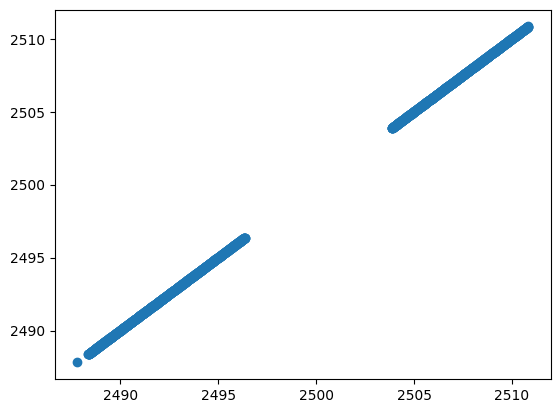

In [3]:


rtc_seconds, sys_seconds = read_data("./data0.csv");
print 
plt.figure(1)
plt.scatter(sys_seconds, rtc_seconds)

del rtc_seconds, sys_seconds

Reset Point is 1146
[21.6, 21.61, 21.62, 21.63, 21.64, 21.65, 21.66, 21.67, 21.68, 21.69, 21.7, 5.98, 5.99, 6.0, 6.01, 6.02, 6.03, 6.04, 6.05, 6.06]


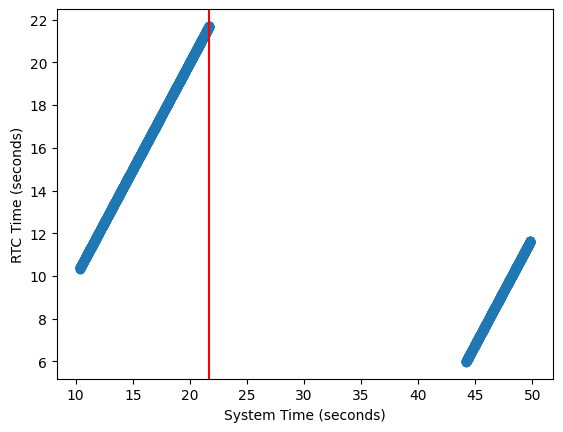

<Figure size 640x480 with 0 Axes>

In [4]:
rtc_seconds, sys_seconds = read_data("./data1.csv")
reset_point = get_reset_point(rtc_seconds)
print(f"Reset Point is {reset_point}")
print(rtc_seconds[reset_point - 10 : reset_point + 10])
plt.figure(2)
plt.axvline(x=sys_seconds[reset_point], color='r', linestyle='-')

plt.scatter(sys_seconds, rtc_seconds)
# plt.plot(sys_seconds, rtc_seconds)
plt.xlabel("System Time (seconds)")
plt.ylabel("RTC Time (seconds)")

plt.figure(3)
# plt.scatter(sys_seconds, rtc_seconds)
del rtc_seconds, sys_seconds

Reset Point is 1867
[37.49, 37.5, 37.51, 37.52, 37.53, 37.54, 37.55, 37.56, 37.57, 37.58, 37.59, 5.54, 5.55, 5.56, 5.57, 5.58, 5.59, 5.6, 5.61, 5.62]


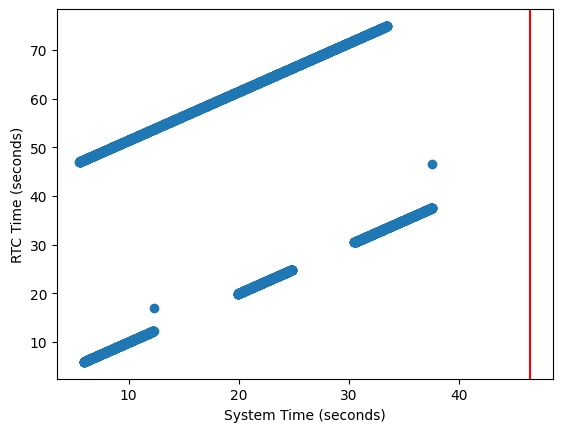

In [5]:
rtc_seconds, sys_seconds = read_data("./data2.csv")
reset_point = get_reset_point(rtc_seconds)
print(f"Reset Point is {reset_point}")
print(rtc_seconds[reset_point - 10 : reset_point + 10])
plt.figure(2)
plt.axvline(x=sys_seconds[reset_point], color='r', linestyle='-')

plt.scatter(rtc_seconds, sys_seconds )
# plt.plot(sys_seconds, rtc_seconds)
plt.xlabel("System Time (seconds)")
plt.ylabel("RTC Time (seconds)")


del rtc_seconds, sys_seconds

# Brownout Test

Reset Point is -1
[]


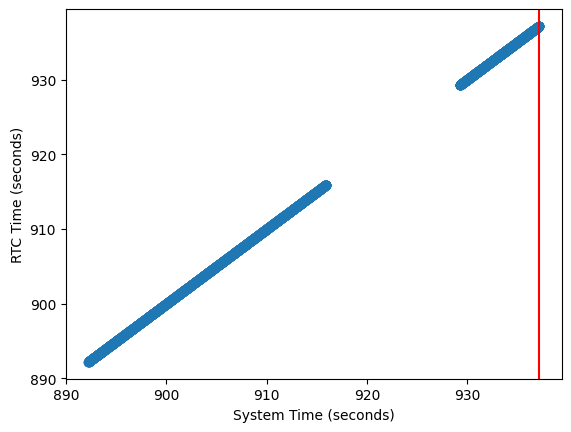

<Figure size 640x480 with 0 Axes>

In [6]:
rtc_seconds, sys_seconds = read_data("./brownout.csv")
reset_point = get_reset_point(rtc_seconds)
print(f"Reset Point is {reset_point}")
print(rtc_seconds[reset_point - 10 : reset_point + 10])
plt.figure(2)
plt.axvline(x=sys_seconds[reset_point], color='r', linestyle='-')

plt.scatter(sys_seconds, rtc_seconds)
# plt.plot(sys_seconds, rtc_seconds)
plt.xlabel("System Time (seconds)")
plt.ylabel("RTC Time (seconds)")

plt.figure(3)
# plt.scatter(sys_seconds, rtc_seconds)
del rtc_seconds, sys_seconds

# Blackout Test

Reset Point is -1
[]


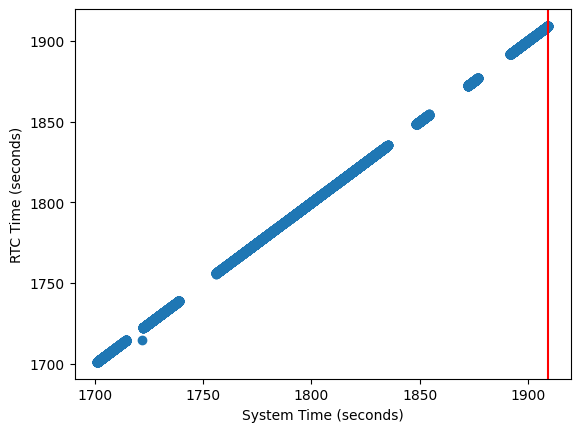

<Figure size 640x480 with 0 Axes>

In [7]:
rtc_seconds, sys_seconds = read_data("./blackout.csv")
reset_point = get_reset_point(rtc_seconds)
print(f"Reset Point is {reset_point}")
print(rtc_seconds[reset_point - 10 : reset_point + 10])
plt.figure(2)
plt.axvline(x=sys_seconds[reset_point], color='r', linestyle='-')

plt.scatter(sys_seconds, rtc_seconds)
# plt.plot(sys_seconds, rtc_seconds)
plt.xlabel("System Time (seconds)")
plt.ylabel("RTC Time (seconds)")

plt.figure(3)
# plt.scatter(sys_seconds, rtc_seconds)
del rtc_seconds, sys_seconds

# Bluetooth Test

Reset Point is 294
[188.6, 188.72, 188.84, 188.99, 189.11, 189.23, 189.35, 189.47, 189.59, 189.71, 189.83, 20.94, 20.98, 20.98, 21.02, 21.06, 21.1, 21.1, 21.14, 21.17]


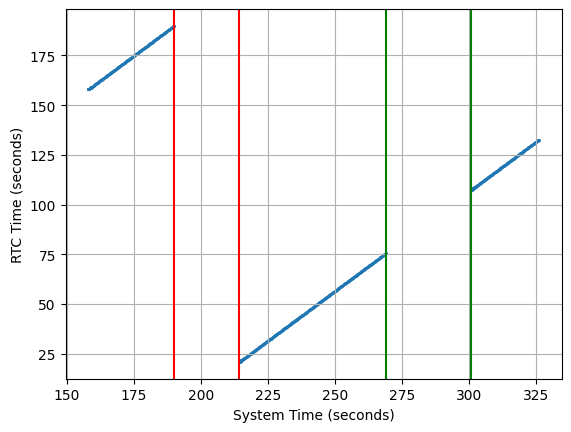

<Figure size 640x480 with 0 Axes>

In [8]:
rtc_seconds, sys_seconds = read_data("./test_bt_recv.csv")
reset_point = get_reset_point(rtc_seconds)
break_point = get_break_point(rtc_seconds)
print(f"Reset Point is {reset_point}")
print(rtc_seconds[reset_point - 10 : reset_point + 10])
plt.figure(2)
plt.axvline(x=sys_seconds[reset_point], color='r', linestyle='-')
plt.axvline(x=sys_seconds[reset_point + 1], color='r', linestyle='-')

plt.axvline(x=sys_seconds[break_point], color='g', linestyle='-')
plt.axvline(x=sys_seconds[break_point + 1], color='g', linestyle='-')


plt.scatter(sys_seconds, rtc_seconds, s=1)
# plt.plot(sys_seconds, rtc_seconds)
plt.xlabel("System Time (seconds)")
plt.ylabel("RTC Time (seconds)")
plt.grid()

plt.figure(3)
# plt.scatter(sys_seconds, rtc_seconds)
del rtc_seconds, sys_seconds

# Brownout 1

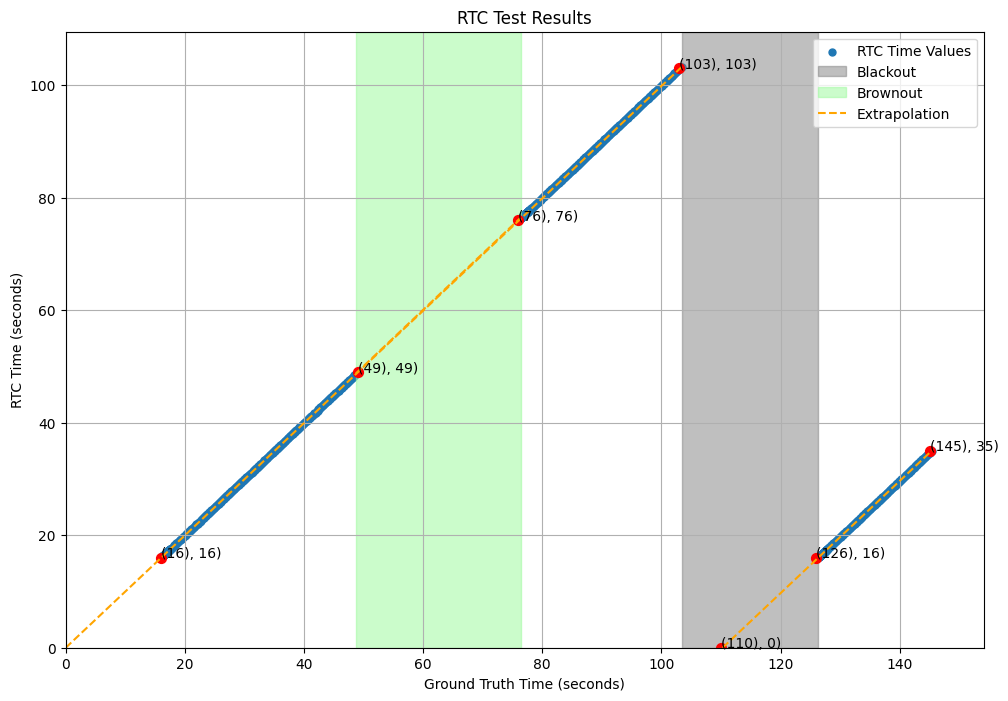

In [9]:
rtc_seconds, sys_seconds = read_data("./brownout1.csv")
reset_point = get_reset_point(rtc_seconds)
break_point = get_break_point(rtc_seconds)

rtc_range = max(rtc_seconds[reset_point + 1:]) - min(rtc_seconds[reset_point + 1:])
sys_range = max(sys_seconds[reset_point + 1:]) - min(sys_seconds[reset_point + 1:])
new_rtc_seconds = rtc_seconds[reset_point + 1:]
new_sys_seconds = [t + new_rtc_seconds[0] - sys_seconds[reset_point + 1] for t in sys_seconds[reset_point + 1:]]
ratio = sys_range / rtc_range
size = 8
f = plt.figure(3, figsize=(size * ratio, size))
ff = f.add_subplot(111)


reset_point2 = get_reset_point(rtc_seconds[reset_point + 1:])
break_point2 = get_break_point(rtc_seconds[reset_point + 1:])
reset_point3 = get_reset_point(new_rtc_seconds)


plt.scatter(new_sys_seconds, new_rtc_seconds, s=25, label="RTC Time Values")
plt.axvspan(new_sys_seconds[reset_point2], new_sys_seconds[reset_point2 + 1], color='grey', alpha=0.5, label="Blackout")
plt.axvspan(new_sys_seconds[break_point2], new_sys_seconds[break_point2 + 1], color='palegreen', alpha=0.5, label="Brownout")

# Extrapolation and Interpolation
rtc_s, sys_s = np.array(new_rtc_seconds).reshape(-1, 1), np.array(new_sys_seconds).reshape(-1, 1)

model = LinearRegression().fit(sys_s[:break_point2], rtc_s[:break_point2])

pred = model.predict(sys_s[break_point2 : break_point2 + 2]);
plt.plot(pred, sys_s[break_point2 : break_point2 + 2], color='orange', linestyle='--')
pred = model.predict(np.array([0, new_sys_seconds[reset_point2]]).reshape(-1, 1))
plt.plot([ 0, new_sys_seconds[reset_point2]], pred, color='orange', linestyle='--')

model2 = LinearRegression().fit(sys_s[reset_point3 + 1:], rtc_s[reset_point3 + 1:]);
x_cross = (- model2.intercept_) / model2.coef_

pred2 = model2.predict(np.insert(sys_s[reset_point3 + 1 :], 0, x_cross).reshape(-1, 1))
plt.plot(np.insert(sys_s[reset_point3 + 1 :], 0, x_cross).reshape(-1, 1), pred2, color='orange', linestyle='--', label="Extrapolation")


data_x = [round(x_cross[0][0])]
data_y = [0]

data_x.append(round(new_sys_seconds[0]))
data_y.append(round(new_rtc_seconds[0]))

data_x.append(round(new_sys_seconds[break_point2]))
data_y.append(round(new_rtc_seconds[break_point2]))
data_x.append(round(new_sys_seconds[break_point2 + 1]))
data_y.append(round(new_rtc_seconds[break_point2 + 1]))

data_x.append(round(new_sys_seconds[reset_point2]))
data_y.append(round(new_rtc_seconds[reset_point2]))
data_x.append(round(new_sys_seconds[reset_point2 + 1]))
data_y.append(round(new_rtc_seconds[reset_point2 + 1]))

data_x.append(round(new_sys_seconds[-1]))
data_y.append(round(new_rtc_seconds[-1]))

plt.scatter(data_x, data_y, s=50, color='red')

for xy in zip(data_x, data_y):
    ff.annotate('(%s), %s)' % xy, xy=xy, textcoords='data')


plt.title("RTC Test Results")
plt.xlabel("Ground Truth Time (seconds)")
plt.ylabel("RTC Time (seconds)")
plt.xlim(0, max(new_sys_seconds) * 1.06)
plt.ylim(0, max(new_rtc_seconds) * 1.06)
plt.grid()
plt.legend(loc='upper right')

del rtc_seconds, sys_seconds, f, ff, new_sys_seconds, new_rtc_seconds, rtc_s, sys_s, data_x, data_y

# Test 2

Gradient: [[0.99947866]] | Y-Intercept: [-0.00503553]
RTC[0] 29.1 | SYS[0] 29.09999990463257 


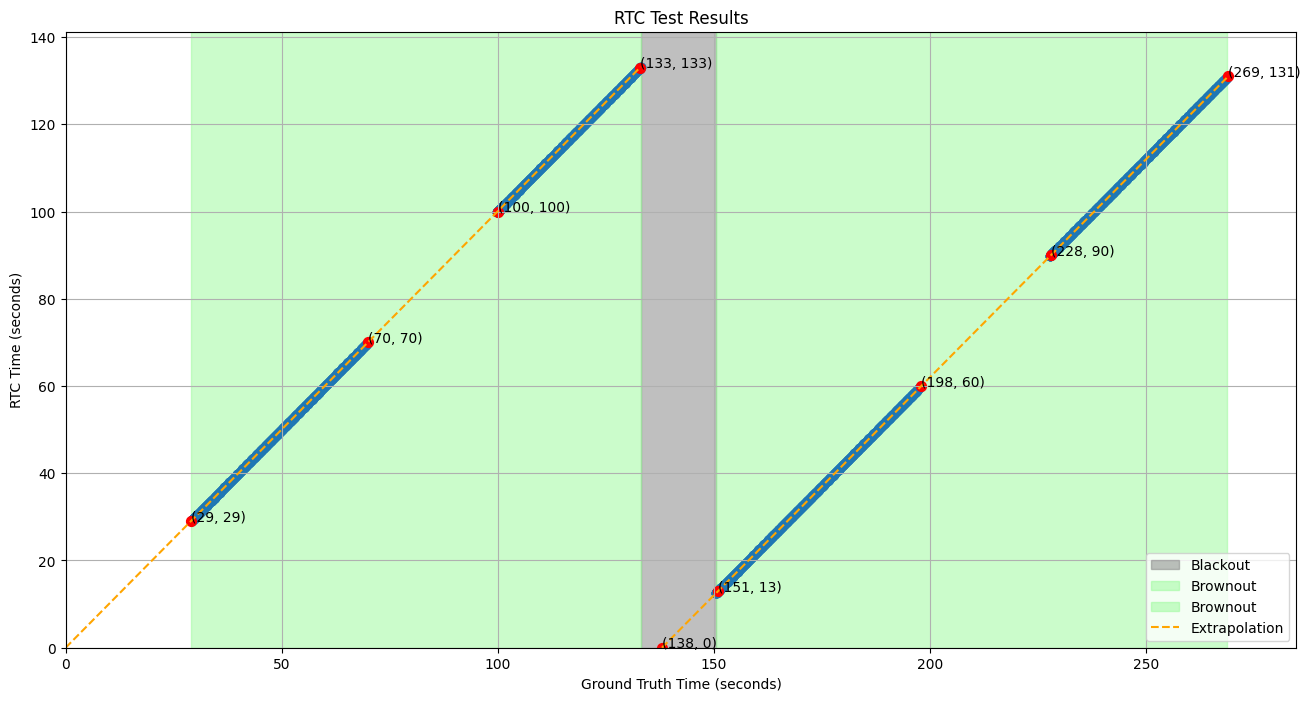

In [10]:
rtc_seconds, sys_seconds = read_data("./test2.csv")

rtc_range = max(rtc_seconds) - min(rtc_seconds)
sys_range = max(sys_seconds) - min(sys_seconds)
ratio = sys_range / rtc_range
size = 8
f = plt.figure(3, figsize=(size * ratio, size))
ff = f.add_subplot(111)


# for i in [int(10     * i) for i in range(int(max(sys_seconds)) - 1)]:
#     plt.axvline(x=i, color='whitesmoke', linestyle='-')

# for i in [int(10 * i) for i in range(int(max(rtc_seconds)) - 1)]:
#     plt.axhline(y=i, color='whitesmoke', linestyle='-')



reset_point = get_reset_point(rtc_seconds)
break_point = get_break_point(rtc_seconds)
break_point2 = get_break_point(rtc_seconds, starting_index=900)
# print(f"Reset Point is {reset_point}")

# plt.axvline(x=sys_seconds[reset_point], color='grey', linestyle='-')
# plt.axvline(x=sys_seconds[reset_point + 1], color='grey', linestyle='-')
plt.axvspan(sys_seconds[reset_point], sys_seconds[reset_point + 1], color='grey', alpha=0.5, label='Blackout')

# plt.axvline(x=sys_seconds[break_point], color='palegreen', linestyle='-')
# plt.axvline(x=sys_seconds[break_point + 1], color='palegreen', linestyle='-')
# plt.axvspan(sys_seconds[break_point], sys_seconds[break_point + 1], color='palegreen', alpha=0.5, label='Brownout')
plt.axvspan(sys_seconds[0], sys_seconds[reset_point], color='palegreen', alpha=0.5, label='Brownout')

# plt.axvline(x=sys_seconds[break_point2], color='palegreen', linestyle='-')
# plt.axvline(x=sys_seconds[break_point2 + 1], color='palegreen', linestyle='-')
# plt.axvspan(sys_seconds[break_point2], sys_seconds[break_point2 + 1], color='palegreen', alpha=0.5, label='Brownout')
plt.axvspan(sys_seconds[reset_point + 1], sys_seconds[-1], color='palegreen', alpha=0.5, label='Brownout')



plt.scatter(sys_seconds, rtc_seconds)
plt.xlabel("Ground Truth (System Time) (seconds)")
plt.ylabel("RTC Time (seconds)")




rtc_s, sys_s = np.array(rtc_seconds).reshape(-1, 1), np.array(sys_seconds).reshape(-1, 1)

model = LinearRegression().fit(sys_s[:break_point], rtc_s[:break_point])
print(f"Gradient: {model.coef_} | Y-Intercept: {model.intercept_}")
# print(sys_s[break_point : break_point + 2])
new_x = np.insert(sys_s[break_point : reset_point], 0, 0).reshape(-1, 1)
# pred = model.predict(sys_s[break_point : break_point + 2]);
pred = model.predict(new_x);
plt.plot(pred, new_x, color='orange', linestyle='--', label="Extrapolation")


model2 = LinearRegression().fit(sys_s[reset_point + 1 : break_point2], rtc_s[reset_point + 1 : break_point2])
# print(f"Gradient: {model2.coef_} | Y-Intercept: {model2.intercept_}")
# print(sys_s[break_point2 : break_point2 + 2])
x_cross = (- model2.intercept_) / model2.coef_

new_x2 = np.insert(sys_s[reset_point + 1 : ], 0, x_cross).reshape(-1, 1)

# pred2 = model2.predict(sys_s[break_point2 : break_point2 + 2]);
pred2 = model2.predict(new_x2);
plt.plot(new_x2, pred2,  color='orange', linestyle='--')

print(f"RTC[0] {rtc_seconds[0]} | SYS[0] {sys_seconds[0]} ")



data_x = [round(x_cross[0][0])]
data_y = [0]
data_x.append(round(sys_seconds[0]))
data_y.append(round(rtc_seconds[0]))

data_x.append(round(sys_seconds[break_point]))
data_y.append(round(rtc_seconds[break_point]))
data_x.append(round(sys_seconds[break_point + 1]))
data_y.append(round(rtc_seconds[break_point + 1]))

data_x.append(round(sys_seconds[break_point2]))
data_y.append(round(rtc_seconds[break_point2]))
data_x.append(round(sys_seconds[break_point2 + 1]))
data_y.append(round(rtc_seconds[break_point2 + 1]))

data_x.append(round(sys_seconds[reset_point]))
data_y.append(round(rtc_seconds[reset_point]))
data_x.append(round(sys_seconds[reset_point + 1]))
data_y.append(round(rtc_seconds[reset_point + 1]))

data_x.append(round(sys_seconds[-1]))
data_y.append(round(rtc_seconds[-1]))

plt.scatter(data_x, data_y, s=50, color='red')

for xy in zip(data_x, data_y):
    ff.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')


plt.title("RTC Test Results")
plt.xlabel("Ground Truth Time (seconds)")
plt.ylabel("RTC Time (seconds)")
plt.xlim(0, max(sys_seconds) * 1.06)
plt.ylim(0, max(rtc_seconds) * 1.06)
plt.grid()
plt.legend(loc='lower right')

del rtc_seconds, sys_seconds, rtc_s, sys_s, data_x, data_y, f, ff

# Bluetooth Transmission Metrics

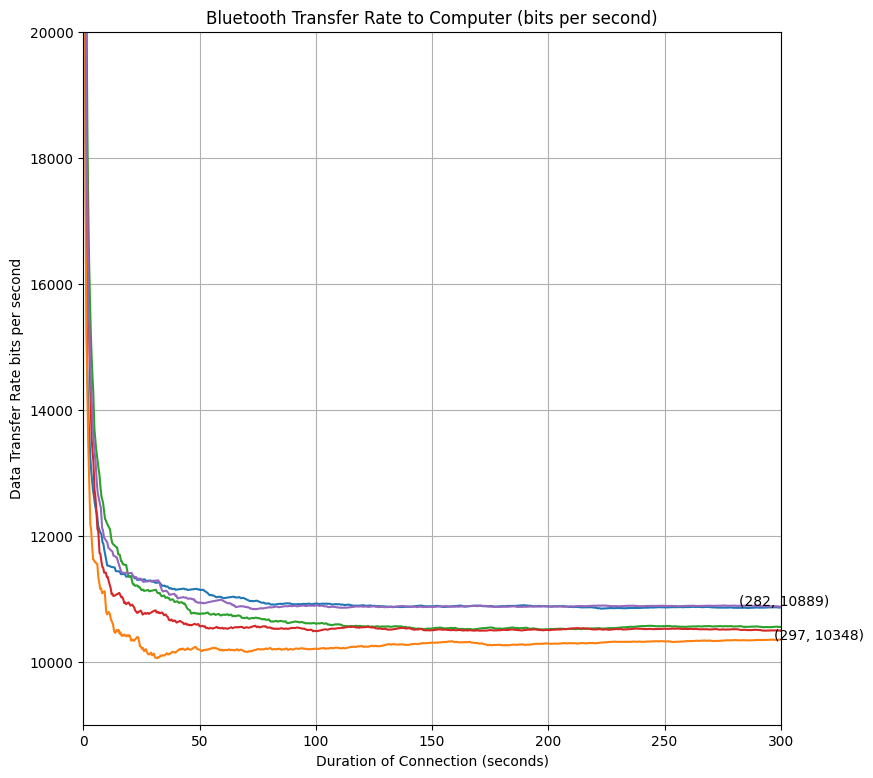

In [11]:
# run_time, mps, bits_ps, bytes_ps = read_bt_data('.\\bt_test_0.csv')
size = 9
f = plt.figure(figsize=(size, size))
ff = f.add_subplot(111)

data_x = []
data_y = []
for i in range(0, 5):

    run_time, mps, bits_ps, bytes_ps = read_bt_data(f".\\bt_test_{i}.csv")
    data_x.append(round(run_time[750]))
    data_y.append(round(bits_ps[750]))
    plt.plot(run_time, bits_ps)

plt.title('Bluetooth Transfer Rate to Computer (bits per second)')
plt.xlabel('Duration of Connection (seconds)')
plt.ylabel('Data Transfer Rate bits per second')
plt.grid()  
plt.ylim(9000, 20000)
plt.xlim(0, 300)
# plt.axhline(y=np.mean(bits_ps[len(bits_ps) - 50:]), color='g', linestyle='-')


# data_x.append(0)
# data_y.append(round(np.mean(bits_ps[len(bits_ps) - 50:])))
max_index = data_y.index(max(data_y))
min_index = data_y.index(min(data_y))
i = 0
for xy in zip(data_x, data_y):
    if i == max_index or i == min_index:
        ff.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
    i += 1
    